# User Clustering

In [102]:
#ref:https://www.reneshbedre.com/blog/tsne.html
import pandas as pd

In [103]:
df=pd.read_csv('./data/extn_pvt_03_08.csv')
df.drop(columns=['hubsextension'],axis=1,inplace=True) #mostly visited extension. so dropping
df.reset_index(inplace=True)
df.head(5)

,index,PreciseTimeStamp,Score,appinsightsextension,appplatformextension,azure_marketplace_confluent,azure_marketplace_datadog,azure_marketplace_dynatrace,azure_marketplace_elastic,azure_marketplace_liftr_logz,...,scanx_management,servicelinkerextension,sqlazureextension,universal_print,vlcentral_casemanagement,vlcentral_quote,vlcentral_uum,vmcp,wandiscoextension,websitesextension
0,0,2022-07-09 16:04:05.3190624,7,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2022-07-09 07:32:12.5085779,9,4,0,0,0,0,0,0,...,0,0,6,0,0,0,0,0,0,40
2,2,2022-07-09 14:33:45.8130206,10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,2022-07-09 14:46:04.3394053,10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,2022-07-09 04:42:36.3291503,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
df.iloc[:,3:]=df.iloc[:,3:].astype(bool).astype(int)

C:\Users\kach\AppData\Local\Temp\ipykernel_19224\1949975659.py:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,3:]=df.iloc[:,3:].astype(bool).astype(int)


In [105]:
df.head(5)

,index,PreciseTimeStamp,Score,appinsightsextension,appplatformextension,azure_marketplace_confluent,azure_marketplace_datadog,azure_marketplace_dynatrace,azure_marketplace_elastic,azure_marketplace_liftr_logz,...,scanx_management,servicelinkerextension,sqlazureextension,universal_print,vlcentral_casemanagement,vlcentral_quote,vlcentral_uum,vmcp,wandiscoextension,websitesextension
0,0,2022-07-09 16:04:05.3190624,7,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2022-07-09 07:32:12.5085779,9,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,2,2022-07-09 14:33:45.8130206,10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,2022-07-09 14:46:04.3394053,10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,2022-07-09 04:42:36.3291503,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
#df=df.head(1000).copy() ###--remove this before full flight

### T-SNE dimensionality reduction

In [107]:
#from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [108]:
tnse_em=TSNE(n_components=2,perplexity=60,n_iter=5000,verbose=1).fit_transform(df.iloc[:,3:])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 181 nearest neighbors...
[t-SNE] Indexed 138954 samples in 0.031s...
[t-SNE] Computed neighbors for 138954 samples in 526.766s...
[t-SNE] Computed conditional probabilities for sample 1000 / 138954
[t-SNE] Computed conditional probabilities for sample 2000 / 138954
[t-SNE] Computed conditional probabilities for sample 3000 / 138954
[t-SNE] Computed conditional probabilities for sample 4000 / 138954
[t-SNE] Computed conditional probabilities for sample 5000 / 138954
[t-SNE] Computed conditional probabilities for sample 6000 / 138954
[t-SNE] Computed conditional probabilities for sample 7000 / 138954
[t-SNE] Computed conditional probabilities for sample 8000 / 138954
[t-SNE] Computed conditional probabilities for sample 9000 / 138954
[t-SNE] Computed conditional probabilities for sample 10000 / 138954
[t-SNE] Computed conditional probabilities for sample 11000 / 138954
[t-SNE] Computed conditional probabilities for sample 12000 / 138954
[t-SNE] Computed conditional prob

[t-SNE] Computed conditional probabilities for sample 118000 / 138954
[t-SNE] Computed conditional probabilities for sample 119000 / 138954
[t-SNE] Computed conditional probabilities for sample 120000 / 138954
[t-SNE] Computed conditional probabilities for sample 121000 / 138954
[t-SNE] Computed conditional probabilities for sample 122000 / 138954
[t-SNE] Computed conditional probabilities for sample 123000 / 138954
[t-SNE] Computed conditional probabilities for sample 124000 / 138954
[t-SNE] Computed conditional probabilities for sample 125000 / 138954
[t-SNE] Computed conditional probabilities for sample 126000 / 138954
[t-SNE] Computed conditional probabilities for sample 127000 / 138954
[t-SNE] Computed conditional probabilities for sample 128000 / 138954
[t-SNE] Computed conditional probabilities for sample 129000 / 138954
[t-SNE] Computed conditional probabilities for sample 130000 / 138954
[t-SNE] Computed conditional probabilities for sample 131000 / 138954
[t-SNE] Computed con

In [109]:
tnse_em.shape

(138954, 2)

In [110]:
tnse_em

array([[-35.514797, -81.61103 ],
       [-37.494587, -83.686516],
       [ 22.542828, -45.649773],
       ...,
       [-57.4305  ,  38.42136 ],
       [ 50.423103,  24.027004],
       [ 90.82927 ,  67.15903 ]], dtype=float32)

In [111]:
df['tsne_1']=tnse_em[:,0]
df['tsne_2']=tnse_em[:,1]

C:\Users\kach\AppData\Local\Temp\ipykernel_19224\3744975396.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['tsne_1']=tnse_em[:,0]
C:\Users\kach\AppData\Local\Temp\ipykernel_19224\3744975396.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['tsne_2']=tnse_em[:,1]


### DBSCAN Clustering

In [112]:
from sklearn.cluster import DBSCAN

In [113]:
get_clusters=DBSCAN(eps=2, min_samples=10).fit_predict(tnse_em)

In [114]:
get_clusters.shape

(138954,)

In [115]:
df['cluster']=get_clusters

C:\Users\kach\AppData\Local\Temp\ipykernel_19224\439734927.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['cluster']=get_clusters


In [116]:
df[['index','tsne_1','tsne_2','cluster']]

,index,tsne_1,tsne_2,cluster
0,0,-35.514797,-81.611031,0
1,1,-37.494587,-83.686516,0
2,2,22.542828,-45.649773,0
3,3,11.063201,-22.717354,0
4,4,78.062836,-0.868771,0
...,...,...,...,...
138949,138949,-48.094112,127.550865,21
138950,138950,-62.734852,73.008194,28
138951,138951,-57.430500,38.421360,50
138952,138952,50.423103,24.027004,0


In [117]:
#set(get_clusters)

### Visualize clusters

In [118]:
import seaborn as sns

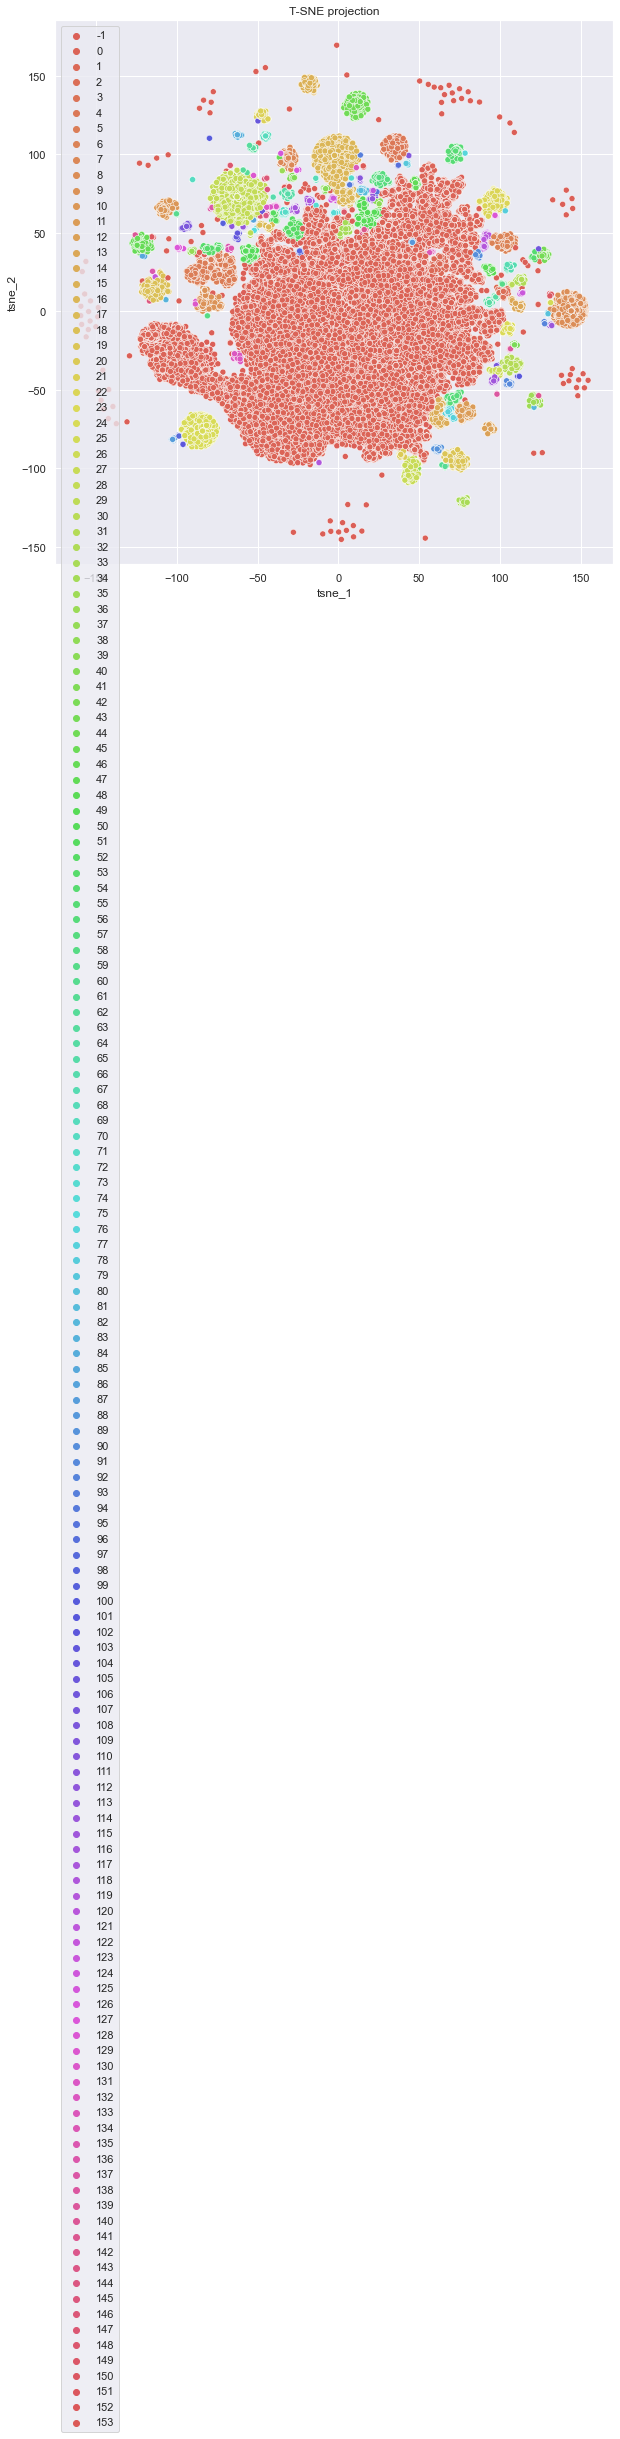

In [119]:
sns.scatterplot(data=df,x='tsne_1',y='tsne_2'
                ,hue=df.cluster.tolist()
               ,palette=sns.color_palette('hls',len(set(get_clusters)))
               ).set(title='T-SNE projection')
sns.set(rc={'figure.figsize':(10,10)})

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
p = sns.scatterplot(data=df, x="tsne_1", y="tsne_2", hue=clusters.labels_, legend="full", palette="deep")
sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2), title='Clusters')
plt.show()

In [ ]:
#todo
# hyper parameter tuning of t-SNE
# hyper parameter tuning of DBSCAN
# try PCA, compare PCA & t-SNE
#